In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
train=pd.read_csv(r'C:\Users\Libin\Desktop\Kaggle\titanic\train.csv')

In [42]:
test=pd.read_csv(r'C:\Users\Libin\Desktop\Kaggle\titanic\test.csv')

In [43]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

(None, None)

In [44]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
plt.figure(figsize=(10,4))

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

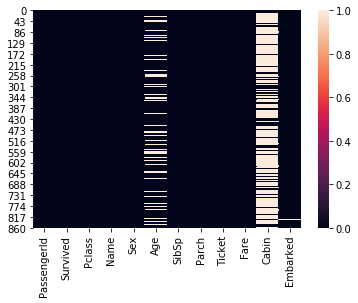

In [47]:
sns.heatmap(train.isnull())

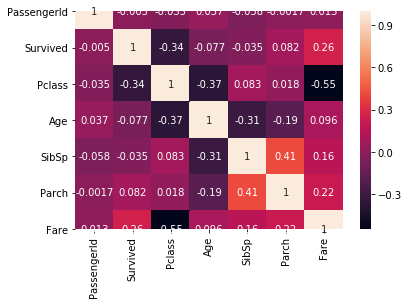

In [48]:
sns.heatmap(train.corr(),annot=True)

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
gen={'male':0,'female':1}
train['Sex']=train['Sex'].map(gen)

In [52]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

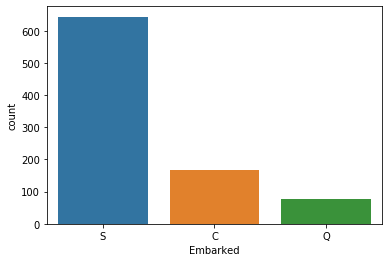

In [53]:
sns.countplot(train.Embarked)

In [54]:
train['Embarked']=train.Embarked.fillna('S')

In [55]:
emba={'S':1,'C':2,'Q':3}

In [56]:
train['Embarked']=train['Embarked'].map(emba)

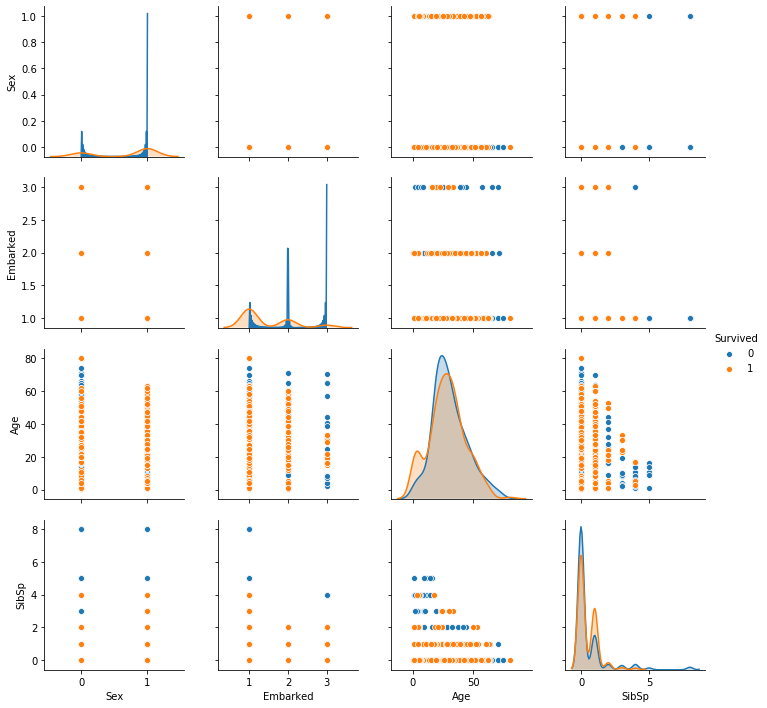

In [57]:
sns.pairplot(train,vars=['Sex','Embarked','Age','SibSp'],hue='Survived')

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1


In [59]:
train=train.drop(['PassengerId','Ticket','Name'],axis=1)

In [60]:
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [61]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [62]:
cab={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8,'U':9}

In [63]:
import re
train['Cabin']=train['Cabin'].fillna('U')

In [64]:
train['Cabin1']=train['Cabin'].map(lambda x: re.compile("([a-zA-Z])+").search(x).group())
train['Cabin1']=train['Cabin'].map(cab)

In [65]:
train['Cabin']=train['Cabin1']

In [68]:
train['Cabin']=train['Cabin'].fillna(0)

In [69]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin1
0,0,3,0,22.0,1,0,7.2500,9.0,1,9.0
1,1,1,1,38.0,1,0,71.2833,0.0,2,NaN
2,1,3,1,26.0,0,0,7.9250,9.0,1,9.0
3,1,1,1,35.0,1,0,53.1000,0.0,1,NaN
4,0,3,0,35.0,0,0,8.0500,9.0,1,9.0


In [70]:
train=train.drop('Cabin1',axis=1)

In [79]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin       False
Embarked    False
dtype: bool

In [80]:
mean=train.Age.mean()
std=train.Age.std()
isn=train['Age'].isnull().sum()

In [85]:
ran=np.random.randint(mean-std,mean+std,size=isn)
age=train['Age'].copy()

In [89]:
age[age.isnull()]=ran

In [93]:
train['Age']=age.astype(int)



In [95]:
train.isnull().sum().any()

False

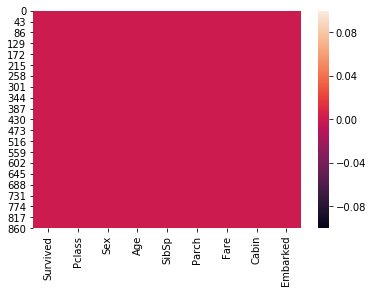

In [96]:
sns.heatmap(train.isnull())

In [100]:
train['Fare']=train.Fare.astype(int)
train['Cabin']=train.Cabin.astype(int)

In [101]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22,1,0,7,9,1
1,1,1,1,38,1,0,71,0,2
2,1,3,1,26,0,0,7,9,1
3,1,1,1,35,1,0,53,0,1
4,0,3,0,35,0,0,8,9,1


In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
Randcla=RandomForestClassifier(n_estimators=100)


In [104]:
from sklearn.model_selection import train_test_split


In [105]:
X=train.drop('Survived',axis=1)

In [106]:
y=train['Survived']


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
Randcla.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [110]:
y_rf_pred=Randcla.predict(X_test)

In [111]:
accuracy_score(y_rf_pred,y_test)

0.7796610169491526

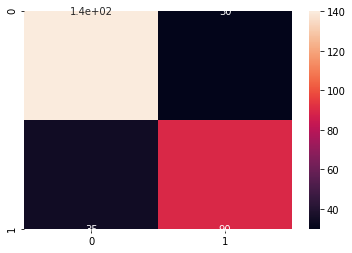

In [112]:
sns.heatmap(confusion_matrix(y_rf_pred,y_test),annot=True)

In [113]:
confusion_matrix(y_rf_pred,y_test)

array([[140,  30],
       [ 35,  90]], dtype=int64)

In [114]:
from sklearn.model_selection import cross_val_score


In [115]:
rf=RandomForestClassifier(n_estimators=100)

In [117]:
scores=cross_val_score(rf,X_train,y_train,cv=10,scoring="accuracy")

In [118]:
print(scores)

[0.75409836 0.83606557 0.75       0.83333333 0.79661017 0.72881356
 0.76271186 0.81355932 0.77966102 0.91525424]


In [119]:
scores.mean()

0.7970107437251088

In [120]:
scores.std()

0.052230177759558245

In [131]:
param_grid={ "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70],  "n_estimators": [100, 400, 700, 1000, 1500]}

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
ranf=RandomForestClassifier(n_estimators=100,max_features='auto',oob_score=True,random_state=1,n_jobs=1)

In [132]:
clf=GridSearchCV(estimator=ranf,param_grid=param_grid,n_jobs=-1)

In [133]:
clf.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=True, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'crite

In [134]:
clf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 5, 'n_estimators': 400}

In [139]:
rsf_bst=RandomForestClassifier(criterion= 'gini', min_samples_leaf= 5, n_estimators= 400,n_jobs=-1)

In [140]:
rsf_bst.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [143]:
y_pred=rsf_bst.predict(X_test)

In [144]:
confusion_matrix(y_pred,y_test)

array([[159,  36],
       [ 16,  84]], dtype=int64)

In [146]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [159]:
precision_score(y_pred,y_test)*100

70.0

In [158]:
recall_score(y_pred,y_test)*100

84.0

In [161]:
f1_score(y_test,y_pred)

0.7636363636363636

In [162]:
from sklearn.metrics import roc_auc_score

In [163]:
roc_auc_score(y_pred,y_test)

0.8276923076923076